# PROGRAM 25
##### Aim : Program to implement k-NN classification using the datasets (Breastcancer.csv,Telco-Customer-Churn.csv) and find the accuracy of the algorithm
##### Date : 28/09/2022 
##### By   : Anu C Scharia

In [718]:
import numpy as np
import pandas as pd
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [719]:
import pandas as pd
df=pd.read_csv('Telco-Customer-Churn.csv')
#print(df)


In [720]:
cols=df.columns
print(cols)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [721]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [722]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [723]:
df.value_counts("Churn")

Churn
No     5174
Yes    1869
dtype: int64

In [724]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')
df=df.dropna()

In [725]:
y=df['Churn'] ##Dependent variable
df.drop('Churn',axis=1,inplace=True)
print(y)

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object


In [726]:
df.drop('customerID', axis = 1,inplace=True)
cols=df.columns
print(cols)
x=df
print(x)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
704

In [727]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
y=label_encoder_y.fit_transform(y)
print("After labeling :\n",y)

After labeling :
 [0 0 1 ... 0 1 0]


In [728]:
label_encoder_x=LabelEncoder()
x.iloc[:,0]=label_encoder_x.fit_transform(x.iloc[:,0])  #gender 
print("After labeling :\n",x)

After labeling :
       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0          0              0     Yes         No       1           No   
1          1              0      No         No      34          Yes   
2          1              0      No         No       2          Yes   
3          1              0      No         No      45           No   
4          0              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038       1              0     Yes        Yes      24          Yes   
7039       0              0     Yes        Yes      72          Yes   
7040       0              0     Yes        Yes      11           No   
7041       1              1     Yes         No       4          Yes   
7042       1              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No      

In [729]:
x.iloc[:,2]=label_encoder_x.fit_transform(x.iloc[:,2]) #partner
print("After labeling :\n",x)

After labeling :
       gender  SeniorCitizen  Partner Dependents  tenure PhoneService  \
0          0              0        1         No       1           No   
1          1              0        0         No      34          Yes   
2          1              0        0         No       2          Yes   
3          1              0        0         No      45           No   
4          0              0        0         No       2          Yes   
...      ...            ...      ...        ...     ...          ...   
7038       1              0        1        Yes      24          Yes   
7039       0              0        1        Yes      72          Yes   
7040       0              0        1        Yes      11           No   
7041       1              1        1         No       4          Yes   
7042       1              0        0         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL         

In [730]:
x.iloc[:,3]=label_encoder_x.fit_transform(x.iloc[:,3]) #Dependents
x.iloc[:,5]=label_encoder_x.fit_transform(x.iloc[:,5]) #PhoneService
x.iloc[:,6]=label_encoder_x.fit_transform(x.iloc[:,6]) #multiplelines
x.iloc[:,7]=label_encoder_x.fit_transform(x.iloc[:,7]) #internet service
x.iloc[:,8]=label_encoder_x.fit_transform(x.iloc[:,8]) #Online Security
x.iloc[:,9]=label_encoder_x.fit_transform(x.iloc[:,9]) #Online Backup
x.iloc[:,10]=label_encoder_x.fit_transform(x.iloc[:,10]) #DeviceProtection
x.iloc[:,11]=label_encoder_x.fit_transform(x.iloc[:,11]) #TechSupport
x.iloc[:,12]=label_encoder_x.fit_transform(x.iloc[:,12]) #StreamingTV
x.iloc[:,13]=label_encoder_x.fit_transform(x.iloc[:,13]) #StreamingMovies
x.iloc[:,14]=label_encoder_x.fit_transform(x.iloc[:,14]) #Contract 
x.iloc[:,15]=label_encoder_x.fit_transform(x.iloc[:,15]) #PaperlessBilling 
x.iloc[:,16]=label_encoder_x.fit_transform(x.iloc[:,16]) #PaymentMethod 
print("After labeling :\n",x)

After labeling :
       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1    

In [731]:
x.shape

(7032, 19)

In [732]:
x=df
one_hot_encoding_columns=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
x=pd.get_dummies(x,columns=one_hot_encoding_columns)
print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_0  ...  \
0                    1           

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[6])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[9])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[12])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[15])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[18])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[21])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[24])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[27])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[30])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[34])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print("After dummy coding :\n",x)
x.shape

In [733]:
#x.dtypes

In [734]:
x.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
PaperlessBilling      0
MonthlyCharges        0
TotalCharges          0
MultipleLines_0       0
MultipleLines_1       0
MultipleLines_2       0
InternetService_0     0
InternetService_1     0
InternetService_2     0
OnlineSecurity_0      0
OnlineSecurity_1      0
OnlineSecurity_2      0
OnlineBackup_0        0
OnlineBackup_1        0
OnlineBackup_2        0
DeviceProtection_0    0
DeviceProtection_1    0
DeviceProtection_2    0
TechSupport_0         0
TechSupport_1         0
TechSupport_2         0
StreamingTV_0         0
StreamingTV_1         0
StreamingTV_2         0
StreamingMovies_0     0
StreamingMovies_1     0
StreamingMovies_2     0
Contract_0            0
Contract_1            0
Contract_2            0
PaymentMethod_0       0
PaymentMethod_1       0
PaymentMethod_2       0
PaymentMethod_3       0
dtype: int64

In [735]:
#convert total charge into numeric
x["TotalCharges"]=pd.to_numeric(x["TotalCharges"],errors='coerce')
print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_0  ...  \
0                    1           

In [736]:
x.dtypes

gender                  int64
SeniorCitizen           int64
Partner                 int64
Dependents              int64
tenure                  int64
PhoneService            int64
PaperlessBilling        int64
MonthlyCharges        float64
TotalCharges          float64
MultipleLines_0         uint8
MultipleLines_1         uint8
MultipleLines_2         uint8
InternetService_0       uint8
InternetService_1       uint8
InternetService_2       uint8
OnlineSecurity_0        uint8
OnlineSecurity_1        uint8
OnlineSecurity_2        uint8
OnlineBackup_0          uint8
OnlineBackup_1          uint8
OnlineBackup_2          uint8
DeviceProtection_0      uint8
DeviceProtection_1      uint8
DeviceProtection_2      uint8
TechSupport_0           uint8
TechSupport_1           uint8
TechSupport_2           uint8
StreamingTV_0           uint8
StreamingTV_1           uint8
StreamingTV_2           uint8
StreamingMovies_0       uint8
StreamingMovies_1       uint8
StreamingMovies_2       uint8
Contract_0

from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x=st_x.fit_transform(x)
print(x)

In [737]:
x.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
PaperlessBilling      0
MonthlyCharges        0
TotalCharges          0
MultipleLines_0       0
MultipleLines_1       0
MultipleLines_2       0
InternetService_0     0
InternetService_1     0
InternetService_2     0
OnlineSecurity_0      0
OnlineSecurity_1      0
OnlineSecurity_2      0
OnlineBackup_0        0
OnlineBackup_1        0
OnlineBackup_2        0
DeviceProtection_0    0
DeviceProtection_1    0
DeviceProtection_2    0
TechSupport_0         0
TechSupport_1         0
TechSupport_2         0
StreamingTV_0         0
StreamingTV_1         0
StreamingTV_2         0
StreamingMovies_0     0
StreamingMovies_1     0
StreamingMovies_2     0
Contract_0            0
Contract_1            0
Contract_2            0
PaymentMethod_0       0
PaymentMethod_1       0
PaymentMethod_2       0
PaymentMethod_3       0
dtype: int64

In [738]:
x=x.dropna()

In [739]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size= 0.25,random_state=0)

In [740]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print("Taining data \n",x_train)
print("Testing data \n",x_test)

Taining data 
 [[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
Testing data 
 [[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [741]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [742]:
y_pred=classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [743]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix (y_test,y_pred,labels=classifier.classes_)
print(cm)

[[1111  200]
 [ 216  231]]


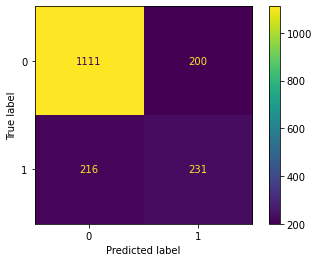

In [744]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [745]:
training_score=classifier.score(x_train, y_train)
test_score=classifier.score(x_test, y_test)
print("Training Accuracy :",training_score)
print("Testing Accuracy :",test_score)

Training Accuracy : 0.8282138794084186
Testing Accuracy : 0.7633674630261661


2 : [0.8581721653394009, 0.7559726962457338]
3 : [0.8558968524838833, 0.7417519908987485]
4 : [0.8386423966628744, 0.767349260523322]
5 : [0.8282138794084186, 0.7633674630261661]
6 : [0.8244216913158893, 0.7838452787258248]
7 : [0.820250284414107, 0.7696245733788396]
8 : [0.8179749715585893, 0.7861205915813424]
9 : [0.8122866894197952, 0.7775881683731513]
10 : [0.810580204778157, 0.7821387940841866]
11 : [0.8141827834660599, 0.7753128555176336]
12 : [0.8109594235874099, 0.7753128555176336]
13 : [0.8064087978763747, 0.7815699658703071]
14 : [0.8081152825180129, 0.7878270762229806]
15 : [0.8102009859689041, 0.7838452787258248]
16 : [0.8064087978763747, 0.7872582480091013]
17 : [0.8020477815699659, 0.7792946530147895]
18 : [0.801668562760713, 0.7861205915813424]
19 : [0.7973075464543041, 0.7810011376564278]
20 : [0.7992036405005688, 0.785551763367463]
21 : [0.7963594994311718, 0.7878270762229806]


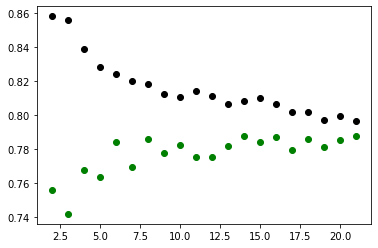

In [748]:
K=[]
training=[]
test=[]
scores={}
for k in range(2, 22):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    training_score=clf.score(x_train, y_train)
    test_score=clf.score(x_test, y_test)
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k]=[training_score, test_score]
for keys, values in scores.items():
    print(keys,':',values)
# visualization    
import matplotlib.pyplot as plt
plt.scatter(K,training,color='k')
plt.scatter(K,test,color='g')
plt.show()